<a href="https://colab.research.google.com/github/marciusdm/dsnp/blob/main/projeto4/FraudDetectionOnCreditCards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [Marcius D. Moraes](https://github.com/marciusdm)*  

---

# Fraud Detecction on credit cards

## 1. Project goal
In this project, we will address the problem of credit card fraud, one of the major concenrs of financial institutions, such as banks and *fintechs*. Only in Brazil, about 12.1 million people were victims of some kind of financial fraude last year. Translating in values financial scam exceeded the figure of R$ 1.8 billion in loss by the last 12 months.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Among these frauds, those involving credit cards have great relevance once that their no-detection will lead on considerable losses, both for the consumer and for the financial institution.  
Anither factor to be considered is the amount of false positives, i.e., those times when you have tried to buy something and you had your card blocked, which probably caused stress and embarassment.  
For all of the reasons above, investing on fraud detecction area by means of Artifical Intelligence has been growing every year, which represents a great copportunity in data science.  
By having large volumes of data as historical basis, a machine learning algorithm just a little better than its precedents it's already enough for saving millions of dollars. That's the challenge: improving more and more use of algoritms that aims to inhibit or avoid fraudulent transactions.



## 2. Importing data

The data we use in this project has obtained from 
[Kaggle](https://www.kaggle.com) platform, which in turn, made use of data  
provided by some European cardholders. This *dataset* presents transactions which happened ocurred in two days of September, 2013, where we have 492 frauds out of almost 290 thosand transactions.  
As you can see, this dataset is extremely unbalanced, on which frauds account for only 0.17% of all transactions.  

Another interesting point is that all *features* are numeric and has been de-characterized, due to legal issues about confidentiality of these kind of data. Thus, column names are named by $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

On the [web-site](https://www.kaggle.com/mlg-ulb/creditcardfraud) from which we've obtained the data, it's also warned that variables have undergone a transformation called Principal Component Analysis (PCA), which allows reducing dimensionality while it keeps the greatest amount of information possible. To achieve this goal, PCA algorithn finds a new set of resources, called **components**.

These components are in quantity smaller or equal to the original variables. In this project, components which suffered this transformation are the columns themselves $[V1, V2, V3 \dots, V28]$.

With these points in mind, let's star working and try to create an efficient model for fraud detteccion from data we have at hand.


In [ ]:
# importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [ ]:
#installing package scikit-polt
!pip install scikit-plot -q

In [ ]:
import scikitplot as skplt

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importing data to a dataframe
df = pd.read_csv(file_path)
# creating test set
test = df.sample(frac=0.15, random_state=0)

# drop on test lines
df_train = df.drop(test.index)


# Verfifying the set
print("Orignal set dimensions", df.shape)
print("Test set dimensions: ", test.shape)
print("Training set dimensions: ", df_train.shape)

Orignal set dimensions (284807, 31)
Test set dimensions:  (42721, 31)
Training set dimensions:  (242086, 31)


## 3. Exploratory analysis
### 3.1 Showing the first entries of the dataset
Firstly, let's preview the first five lines and data types of its columns



In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 3.2 Discovering data types
The command below serves to show data types of each of the coluns of the dataset
:

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

As we can see, all data are numerical. Let's now create a data dictionary with information provided by Kaggle
### 3.3. Data dictionary
`Time`: Elapsed time in seconds between current transaction and the first one in the dataset;  
`Amount`: Transaction amount. The descriptive page of dataset on Kaggle doesn't inform what currency is being used, but it's presumed to be the Euro, considering that these are transactions which take place in Europe;  
`Class`: Response variable. Indicates transaction type regarding its legitimacy. When  it's `0`, it's a normal transaction; if `1`, it's a fraudulent one.  
`V1` a `V28`: Columns with numerical values resulted from a de-characterization process of the original data made in order to preserver confidential information.

### 3.4 Statistical data summary
Let's check statistical data of this dataset:

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


According to Kagle site, only columns `Time` and `Amount` didn't undergo PCA process.  
As we can see, such process caused mean and median in the other columns to be close to 0. Besides, this process doesn't leave null values as we can notice by executing the comand below:

In [ ]:
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Our target variable is `Class`. When its value is 1, the transaction is fraud and when it's 0, the transaction is legitimate. According to [data description](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), only 0.17% of all tranasctions are fraud.

### 3.5. Verifying data balancing
Let's plot an histrogram with occurrence of the classes:

0    284315
1       492
Name: Class, dtype: int64

Frauds account for 0.1727% of the dataset.



[]

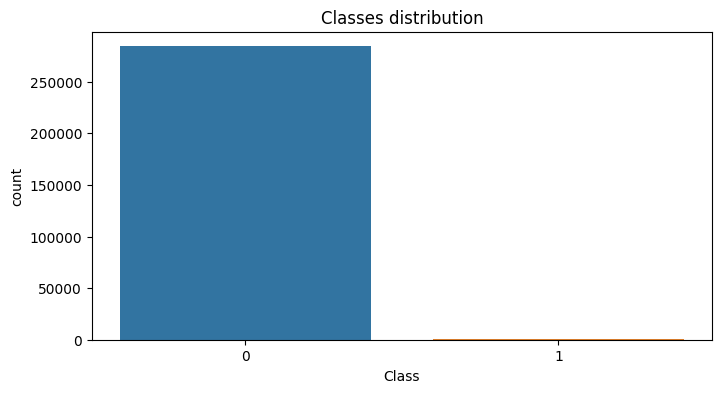

In [ ]:
# plot a bar graph for all classes
# see class balance 
print(df.Class.value_counts())
print("\nFrauds account for {:.4f}% of the dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Class', data=df, ax=ax)
ax.set_title('Classes distribution')
plt.plot()

As we can notice, frauds account for such a small percentage that they barely appear on chart above. This means that we´ll have to make a processs for balancing data in order to improve precision of our machine learning model.
### 3.6 Studying normal and fraudulent transactions behavior
Before that, we will check if there is some relationship between transaction amout and its legitimacy, or if there is a period of time more prone to having frauds. To do so, we wiil plot historgrams so we can visualize how is the distribution of the values of columns `Time` and `Amount` when transaction is normal and when transaction is fraudulent.


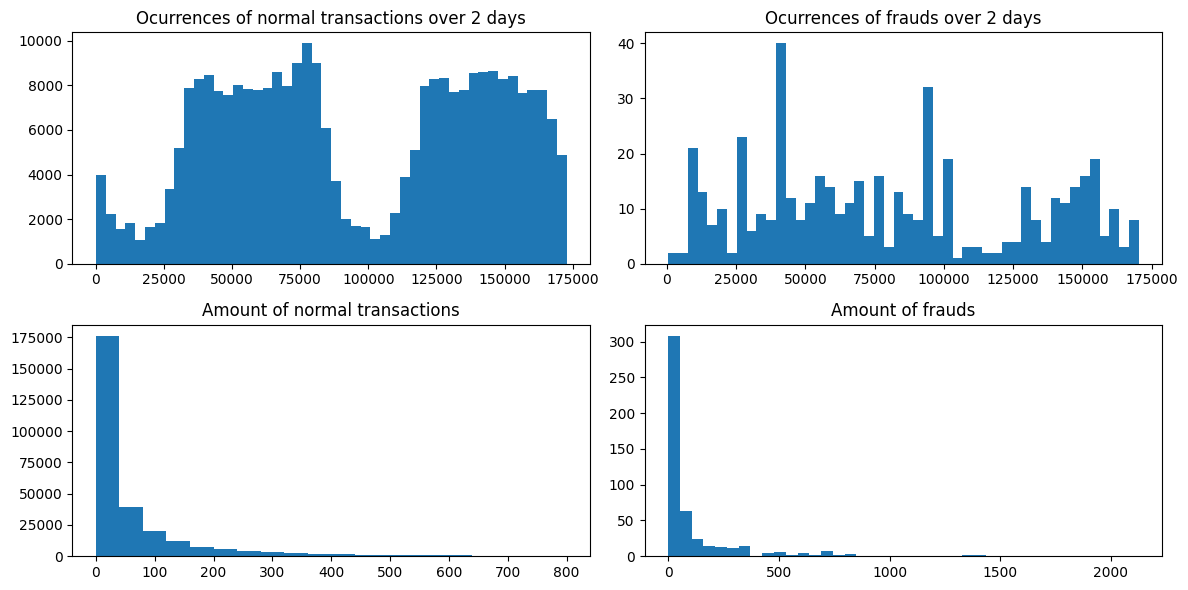

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12,6))
ax1.hist("Time",data=df[df.Class==0],bins=48)
ax1.set_title("Ocurrences of normal transactions over 2 days")
ax2.hist("Time",data=df[df.Class==1],bins=48)
ax2.set_title("Ocurrences of frauds over 2 days")
##eliminando outliers p/ melhor visualização do histograma de montante da transação
ax3.set_title("Amount of normal transactions")
ax3.hist("Amount",data= df[(df.Class==0) & (df.Amount <=800.0)], bins=20) 
ax4.set_title("Amount of frauds")
ax4.hist("Amount",data= df[(df.Class==1) ], bins=40) #& (df.Amount <=200.0)
plt.tight_layout()



We can notice a well defined pattern on the upper left chart, which concerns on volume of normal transactions regarding the time at which the transactions occurred. The time of the first transaction was not informed, nor whether it was on a business day or weekend. Probably these transactions occurred on two weekdays, given the similar patterns on the two halves of the chart. Besides, the first transaction, likely occurred close to midnight, when volume of the transactions decreases, returning to increase from the 6th hour at very beginning of the day. 
As for illegitmate transactions, they seem to follow the normal ones, but it isn't very clear, maybe this is caused the low volume of frauds.  
Let's compare the amount of the two types of transction, by plotting a box plot, which displays the averages, medians and quartiles.


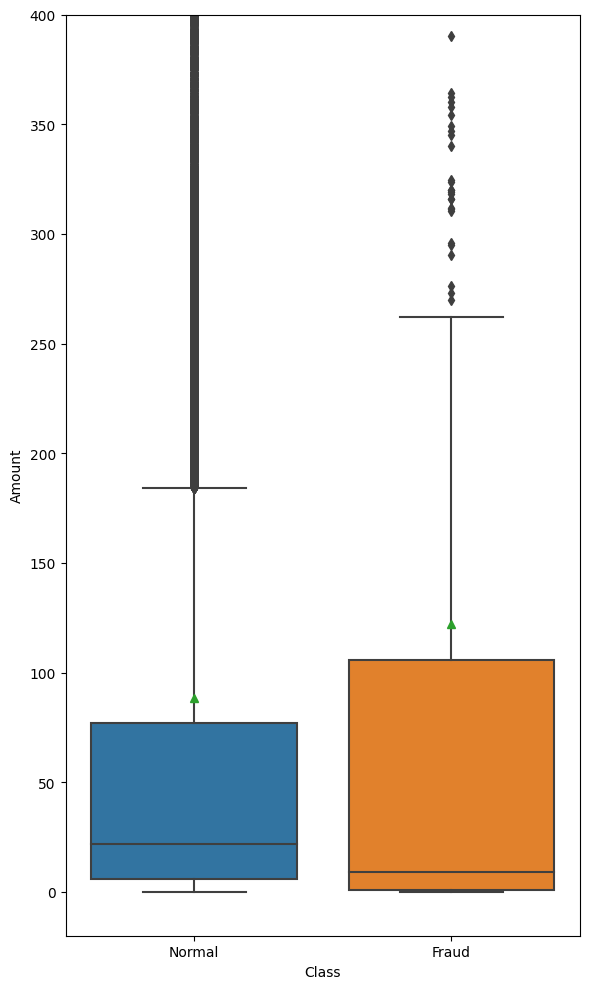

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(x=df.Class, y=df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraud'])

plt.tight_layout()

We can perceive by graph above that the average value for frauds (indicate by the small green triangle) is slightly greater than that for normal transactions; moreover, on the last ones, values are more sparse, however this may be caused by the low volume of frauds compared to the legitimate purchases.
### 3.7 Analysing relationship between variables
Now we will check if there is a connection among the different variables of this dataset by plotting a correlation matrix:


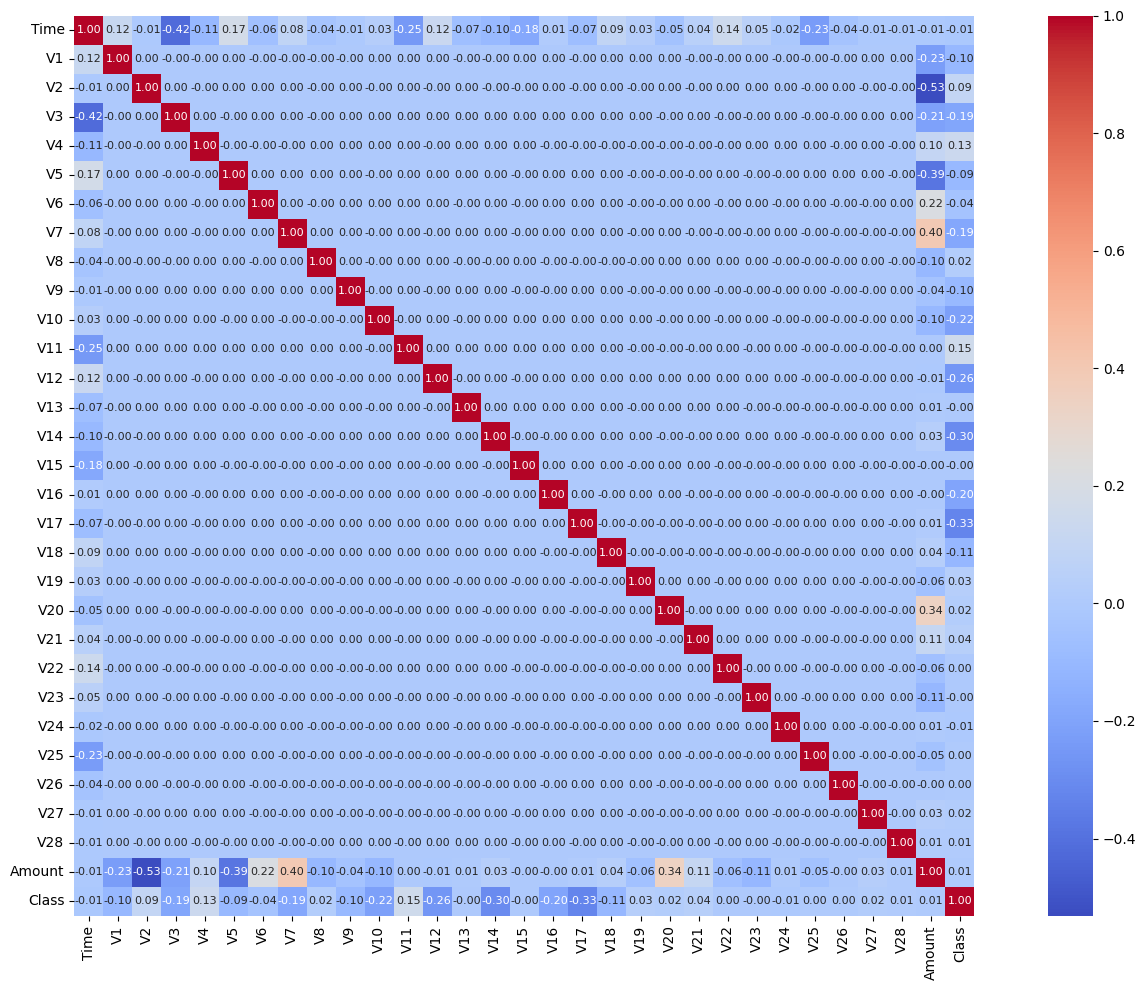

In [ ]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, fmt='.2f', square=True, linecolor='white', cmap='coolwarm', vmax=1.0, annot=True,annot_kws={'size':8.0});
plt.tight_layout()


The heatmap above shows that there is a weak correlation among these variables. Only a slight correlation between variables `V2` and `Amount`. Let's now analyze the behavior of the variable from `V1` to `V28` when value of `Class` =1 (fraud) and when its value is 0 (normal). To do so, we will plot charts called "[Kernel density estimation](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde), which try to estimate the density probability funcion  (DPF) of all of thes variables.


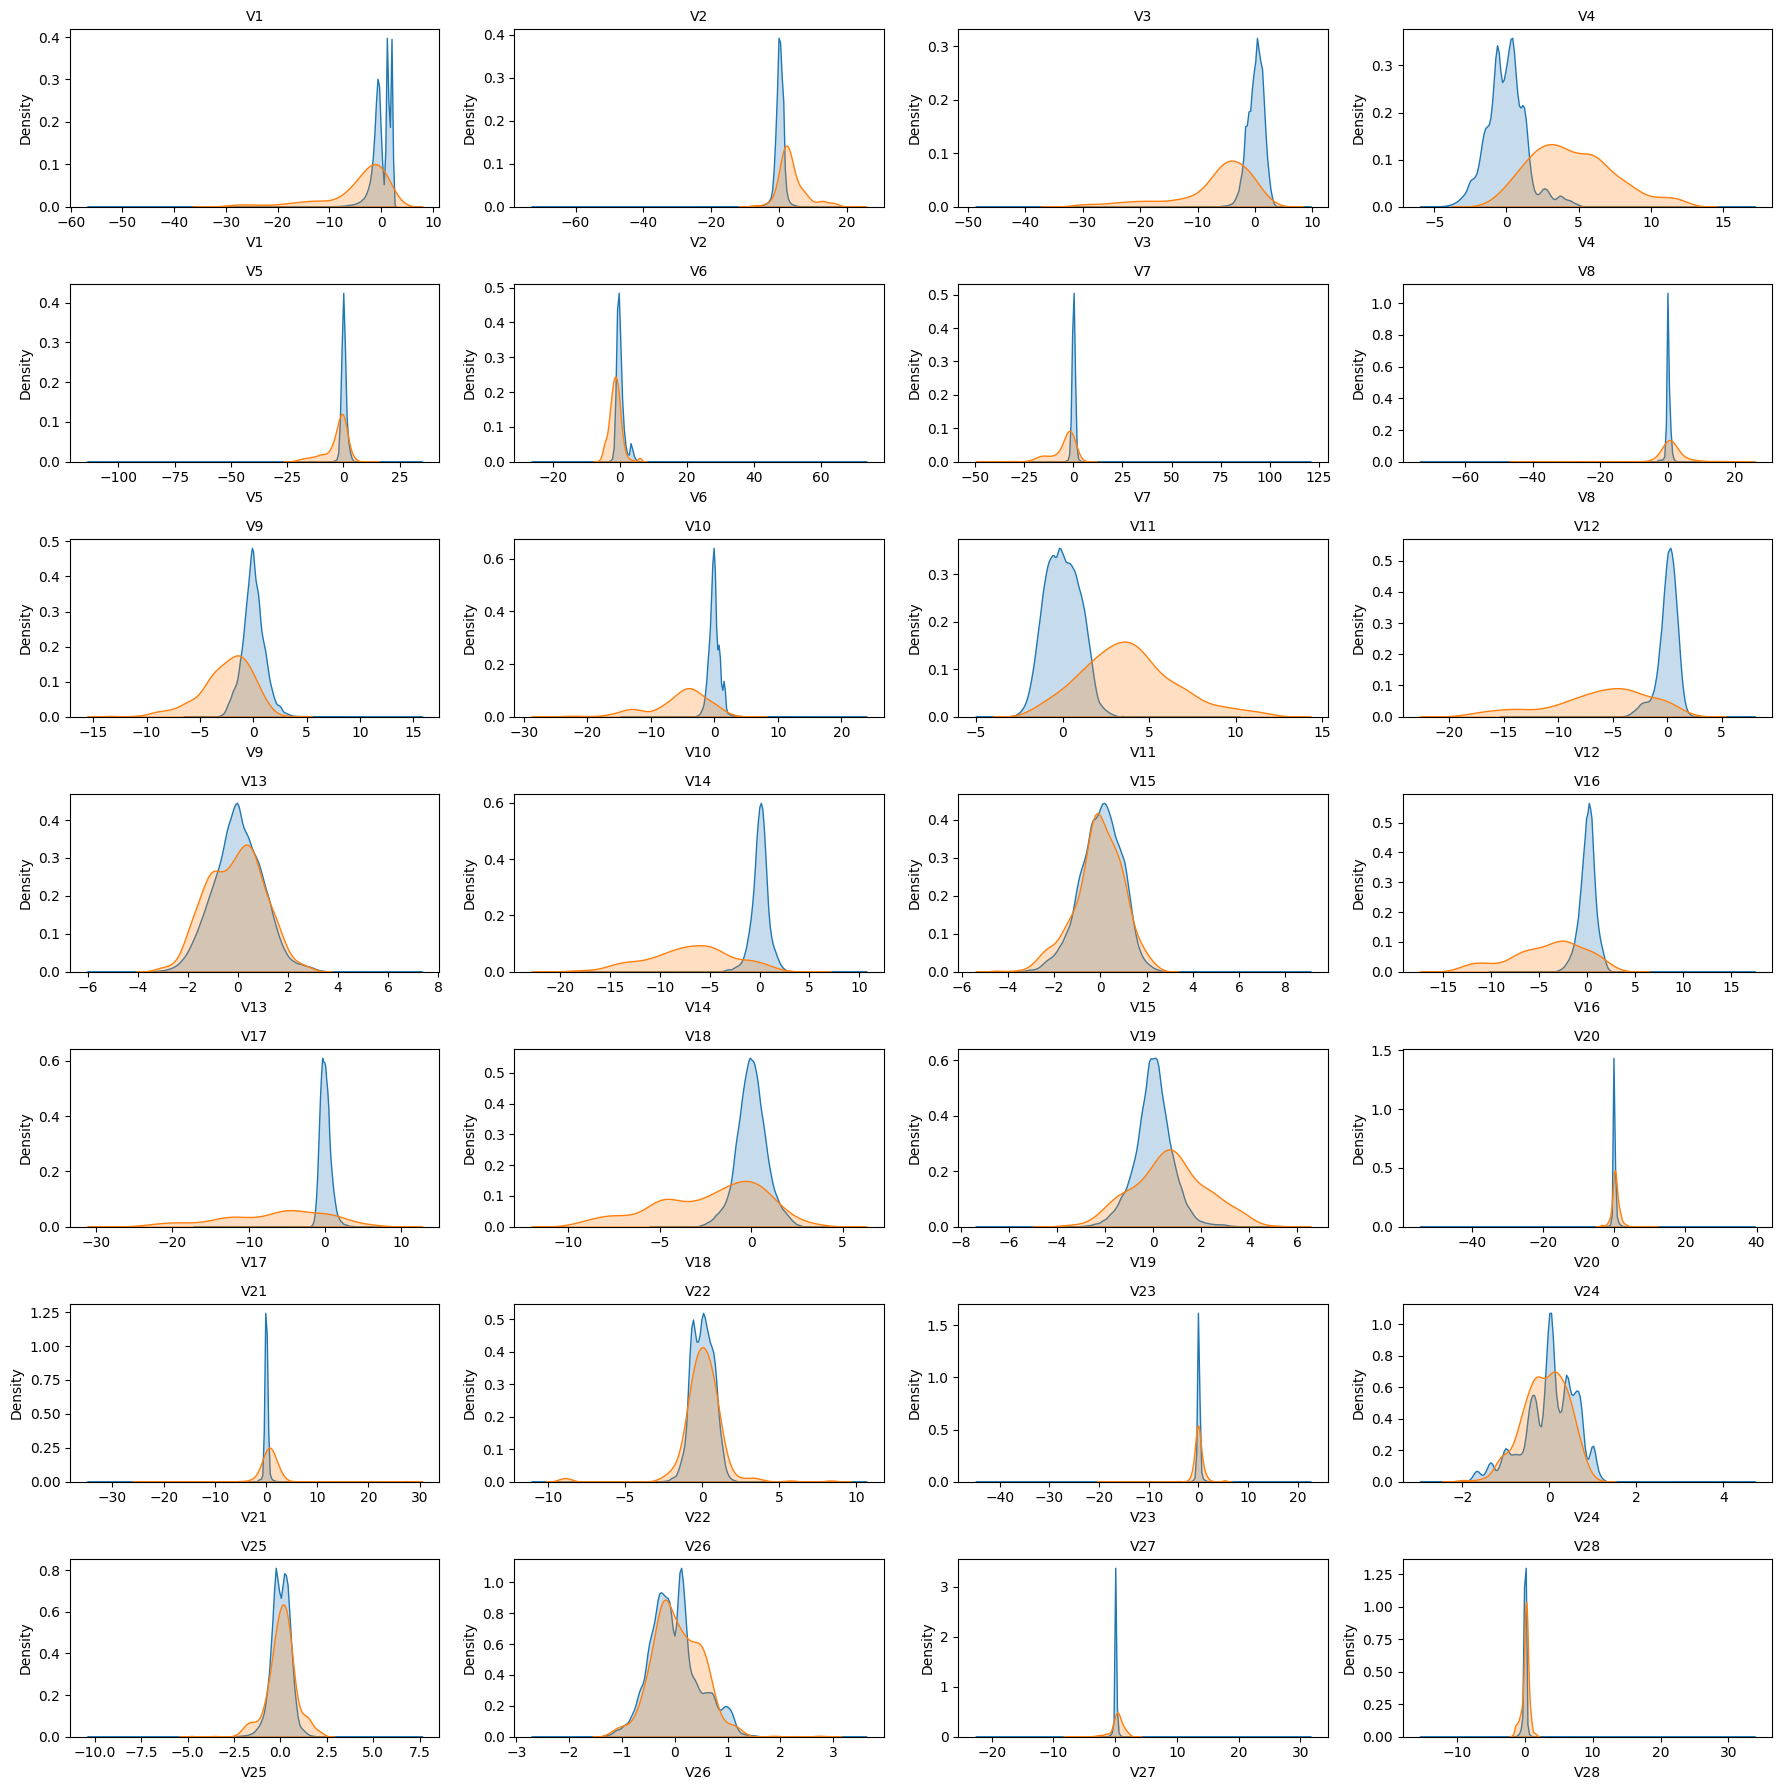

In [ ]:
#* Ploting a correlation matrix
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    #sns.kdeplot(df,x=col, hue="Class", fill=True)
    sns.kdeplot(df_class_0[col], label="Class 0", fill=True)
    sns.kdeplot(df_class_1[col], label="Class 1", fill=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


On the figure above, regions in blue corresponds to the normal transactions and the ones in orange corresponds to the frauds. Notice that some variables, such as `V3`, `V4`, `V11` and `V14` present a behavior very different according to the type of transcions. As for variables such as `V15`, `V22` and `V26`, they present a similar behavior.  
We've already seen that data are very imbalanced and moreover, `Amount` and `Time` variables are not standardized. We will deal with this on next step.


## 4. Preparing data
### 4.1 Standardization
Initiall we will standardize columns that not underwent the PCA treatment. The standardization causes values on each column to have mean equal to 0 and standard deviation equal to 1. For this, the formula below is used:
\begin{align}
z=\frac{x-\mu}{\sigma} 
  \end{align}
Where:  
*x*: present value of the column;  
$\mu$: present mean of all values of this column;  
$\sigma$: standard deviation of values of this column.

Standardization aims to improve performance measures of machine learning methods. Further details can be seen on this [article](https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)  
For doing data standardization, we use `StandardScaler` class:



In [ ]:
# padronizar as colunas Time e Amount
df_clean = df_train.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


### 4.2 Splitting into training and validation set
On this step we will split the date into two groups, training and test group, with the intention of to check if balancing process, was made properly. 


In [ ]:
# splitting variables into X and y
X = df_clean.drop('Class', axis=1)
y = df_train['Class']

# splitting dataset into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

### 4.3 Balancing
When data is imbalanced, like this one, our machine learning model may become inaccurate, so we will balance it by using a technique called *undersampling*, which extracts a random subset of the majority class, preserving the minority one.

0    313
1    313
Name: Class, dtype: int64


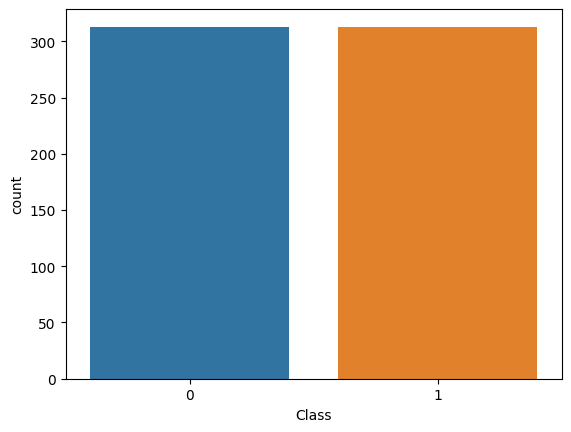

In [ ]:
# Using the under-sampling tehnique
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# check balancing of the classes
print(y_rus.value_counts())

# plotting the new distribution of the classess
sns.countplot(x=y_rus);

Now, with data balanced let's view plot the correlation matrix among the variables:

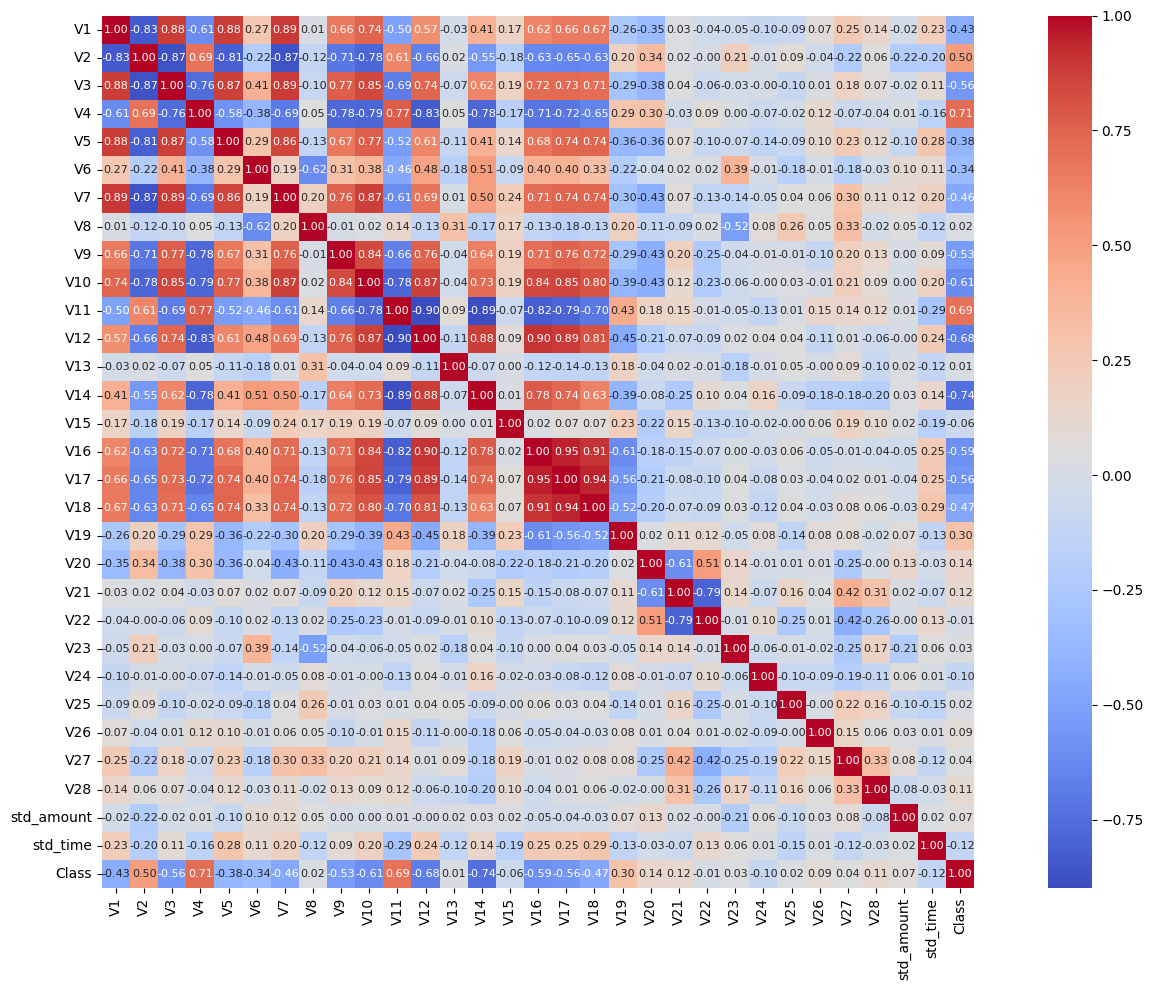

In [ ]:
# pltting correlation matrix
df_balanced = X_rus.copy()
df_balanced['Class']=y_rus
corr_rus = pd.DataFrame(df_balanced).corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_rus, fmt='.2f', square=True, linecolor='white', cmap='coolwarm', vmax=1.0, annot=True,annot_kws={'size':8.0});
plt.tight_layout()


Note that after balancing, vairables from `V1` to `V18`, except `V8`,`V13` and `V15` present a stronger correlation with themselves and with the  `Class` variable.

## 5. Machine Learning Model
### 5.1 Initial considerations
When running code which makes the predicions, it was discoverd that performance measures change every time it executes due to random nature of training/test splitting, with intention of gathering more realistic results, all machine learning predictions were run 10 times and the median of all of theses executions was extracted and it will be shown at the end of this notebook
### 5.2 Build a model with logistic regression
With all data prepered, let's now buils a classifier model based on logistic regression. This model will be trained upon `X_rus` and `Y_rus' data. Next we will make the predictions upon test data.

In [ ]:
execution_no = 10

In [ ]:
# instanitate e train a logistic regression model
#This code run 10 times
np.random.seed(20)
# Instantiate and choose hyperparameters
model = LogisticRegression(max_iter=300)
# 4. model fit (training)
model.fit(X_rus, y_rus)

# make predictions upon test data
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

When data is imbalanced, accuracy is not a good performance measure. In this case, precision, recall and [Area Under the Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) are more important measures.
### 5.3 Checking it's performance
Note: data below refer to the last run of the machine learning model.

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9623    0.9807     60417
           1     0.0408    0.9238    0.0782       105

    accuracy                         0.9622     60522
   macro avg     0.5204    0.9431    0.5295     60522
weighted avg     0.9982    0.9622    0.9792     60522

Accuracy: 0.9622
AUC: 0.9431

Accuracy	Precision	Recall	F1-score	AUC
0.9622		0.0408		0.9238	0.0782		0.9431

Total of positive records: 105
Total of negative records: 60417
Execution no. 10


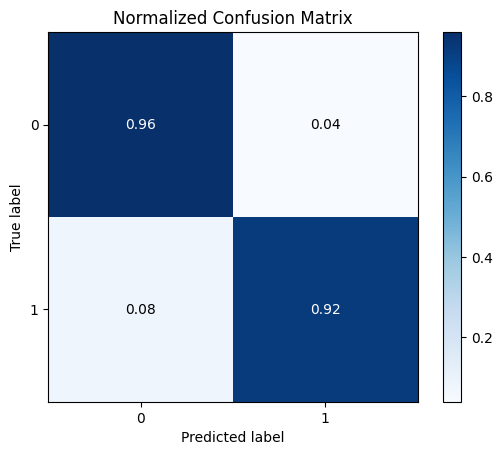

In [ ]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))
precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

The model above, on average, hit 89% of all fradulent transaction; however, it makes many positive prediction incorrectly. This reflects on the very low precision of this model (less than 5%).

Final result:  
Accuracy: 96.2%. Precision: 4.1%. Recall: 90.7%. F1-score: 0.083. AUC: 0.937 

### 5.4 Making predictions on the test set
At the beginning of this project we separetd a portion of the data for testing and forth we subdivided the remaining data on training and validation set. Now, it's time to test the efficiency of our machine learning model upon the initial test data. But, before that we have to normalize the test data as it was made with the other data:


In [ ]:
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# see the first entries
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Now, we have just to split data into X and Y and make the predictions:


In [ ]:
# split variables into X and y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

Now let's view the results:





Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9634    0.9813     42647
           1     0.0435    0.9595    0.0832        74

    accuracy                         0.9634     42721
   macro avg     0.5217    0.9614    0.5323     42721
weighted avg     0.9983    0.9634    0.9798     42721

Accuracy: 0.9634
AUC: 0.9614

Accuracy	Precision	Recall	F1-score	AUC
0.9634		0.0435		0.9595	0.0832		0.9614

Total of positive records: 74
Total of negative records: 42647
Execution no. 10


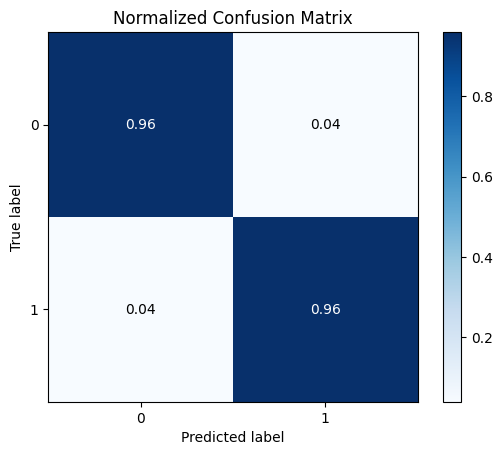

In [ ]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
auc=roc_auc_score(y_test, y_test_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_test, y_test_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

Upon test data, this model has identified hit 92% of frauds, a slightly better performance than that obtained when the model was applied on the validation data

Final result:  
Accuract: 96.3%. Precision: 4.5%. Recall: 92.6%. F1-score: 0.081. AUC: 0.950

## 6. Using other machine learning models
Now, we will compare logistic regression model with other machine learning techniques. We will use Naive Bayes, K-nearest neighbours and decision tree.  As with logistic regression model, all models will run 10 times and then we'll extract a summary.
### 6.1 Naive Bayes
The first model to be run is Naive Bayes


In [ ]:
# instantiate and train a Naive Bayes model
gnb = GaussianNB()
# 4. model fit (train)
gnb.fit(X_rus, y_rus)

# make the predictions upon test data
y_pred = gnb.predict(X_val)
y_proba = gnb.predict_proba(X_val)

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9514    0.9750     60417
           1     0.0310    0.8952    0.0600       105

    accuracy                         0.9513     60522
   macro avg     0.5154    0.9233    0.5175     60522
weighted avg     0.9981    0.9513    0.9734     60522

Accuracy: 0.9513
AUC: 0.9233

Accuracy	Precision	Recall	F1-score	AUC
0.9513		0.0310		0.8952	0.0600		0.9233

Total of positive records: 105
Total of negative records: 60417
Execution no. 10


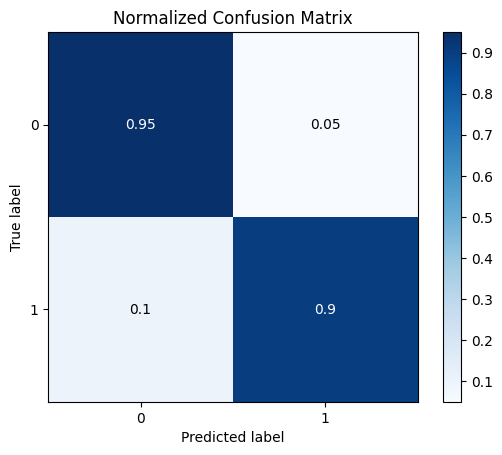

In [ ]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])

print("Execution no.", execution_no)

Naives Bayes model had the lowest performance of all tested model. Besides, had the same problem of having to many false positives, although it wasn't the worst on this subject.

Final result:  
Accuracy: 96.9%. Precision: 4.7%. Recall: 86.2%. F1-score: 0.088. AUC: 0.919
### 6.2 K-Nearest-Neighbours
Let's now try a K-Nearest-Neighbours model:


In [ ]:
clf = neighbors.KNeighborsClassifier(7, weights="distance")
clf.fit(X_rus, y_rus)

# make the predictions upon validation data
y_pred = clf.predict(X_val)
y_proba = clf.predict_proba(X_val)

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9810    0.9903     60417
           1     0.0764    0.9048    0.1408       105

    accuracy                         0.9808     60522
   macro avg     0.5381    0.9429    0.5656     60522
weighted avg     0.9982    0.9808    0.9888     60522

Accuracy: 0.9808
AUC: 0.9429

Accuracy	Precision	Recall	F1-score	AUC
0.9808		0.0764		0.9048	0.1408		0.9429

Total of positive records: 105
Total of negative records: 60417
Execution no. 10


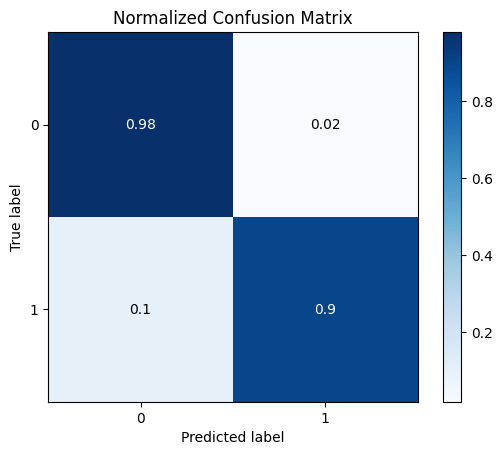

In [ ]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

<p align="justify">
In general, this model was the one which had the best accuracy and the best precision among all model that used under-sampling technique, however its ability to detect correctly frauds was only a little better than Naive Bayes model, which was the worst on this subject. 

**Final result:**  
Accuracy: 98.4%. Precision: 8.7%. Recall: 87.6%. F1-score: 0.162. AUC: 0.926

</p>

###6.3 Decision tree
Finally we will create a decision tree machine learning model.

In [ ]:
# 1. choosing and importing a model

# 2. Instantiate e choose hyperparameters
dtc = DecisionTreeClassifier(max_depth=3, criterion="entropy")
dtc.fit(X_rus, y_rus)

# make the predictions on validation data
y_pred = dtc.predict(X_val)
y_proba = dtc.predict_proba(X_val)


Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9144    0.9552     60417
           1     0.0186    0.9333    0.0365       105

    accuracy                         0.9144     60522
   macro avg     0.5092    0.9238    0.4958     60522
weighted avg     0.9982    0.9144    0.9536     60522

Accuracy: 0.9144
AUC: 0.9238

Accuracy	Precision	Recall	F1-score	AUC
0.9144		0.0186		0.9333	0.0365		0.9238

Total of positive records: 105
Total of negative records: 60417
Execution no. 10


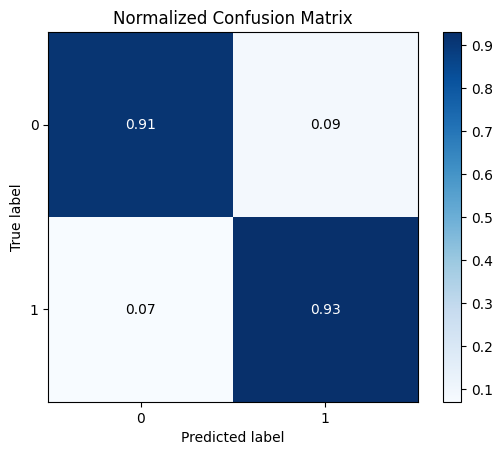

In [ ]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

This method had the lowest accuracy and the lowest precision of all methods (less than 3%), however, it was the best in identifying precisely positive results (92.3%)

**Final result:**   
Accuracy: 93.3%. Precision: 2.3%. Recall: 92.3%. F1-score: 0.046. AUC: 0.923   

Until this point, all models has used a dataset which was balanced by using a under-sampling technique, that delete records of majority class.  
Now, we use another technique called "over-sampling", which create dummy records of the minority class. Our goal is to improve performance measures, specilly the precision, which was very poor in all models created so far.  
We will implement over-sampling by using an algorithm named SMOTE, which generetes samples of the minority class usubg K-Nearest-Neighbours method.

## 6.3 Logistic regression using *over-sampling*
Firstly we will balance data:

0    181251
1    181251
Name: Class, dtype: int64


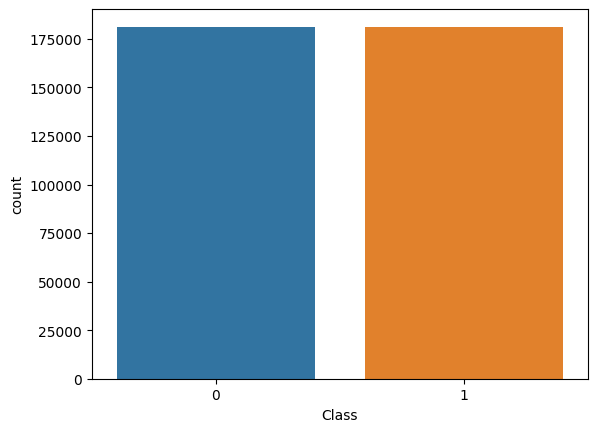

In [ ]:

# instantiate  SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

X_smt, y_smt = smote.fit_resample(X_train, y_train)

# check class balancing
print(y_smt.value_counts())

# plot the new distribution of the classes.
sns.countplot(x=y_smt);

In [ ]:
# Instantiate and choose hyperparameters
model_smt = LogisticRegression(max_iter=300)

# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, stratify=y_smt, test_size=0.3, random_state=42)

# 4. model fit (training)
model_smt.fit(X_train, y_train)

# make the predictions upon test data
y_pred = model_smt.predict(X_test)
y_proba = model_smt.predict_proba(X_test)

Classification Report:
               precision    recall  f1-score   support

           0     0.9145    0.9732    0.9429     54376
           1     0.9714    0.9090    0.9391     54375

    accuracy                         0.9411    108751
   macro avg     0.9429    0.9411    0.9410    108751
weighted avg     0.9429    0.9411    0.9410    108751

Accuracy: 0.9411
AUC: 0.9411

Accuracy	Precision	Recall	F1-score	AUC
0.9411		0.9714		0.9090	0.9391		0.9411

Total of positive records: 54375
Total of negative records: 54376
Execution no. 10


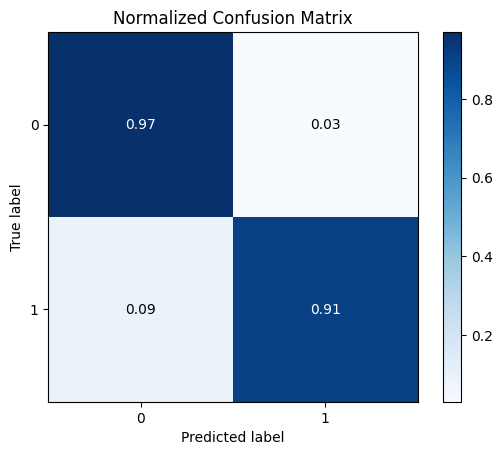

In [ ]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc=roc_auc_score(y_test, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_test, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

The over-sampling technique has greatly reduced the incidence of false negatives, so that the precision of this model has reached 97%, and the recall have been practically identical to the decision tree model (92.2%)m slightly better than the logistic regression with under-sampling (90.8%). 

Final result:  
Accuracy: 94.6%. Precision: 97.0%. Recall: 92.2%. F1-score: 0.945. AUC: 0.946

And finally, let's test our model on the original data test:


In [ ]:
# splitting variable into X and y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

y_test_pred = model_smt.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9745    0.9870     42647
           1     0.0613    0.9595    0.1152        74

    accuracy                         0.9745     42721
   macro avg     0.5306    0.9670    0.5511     42721
weighted avg     0.9983    0.9745    0.9855     42721

Accuracy: 0.9745
AUC: 0.9670

Accuracy	Precision	Recall	F1-score	AUC
0.9745		0.0613		0.9595	0.1152		0.9670

Total of positive records: 74
Total of negative records: 42647
Execution no. 10


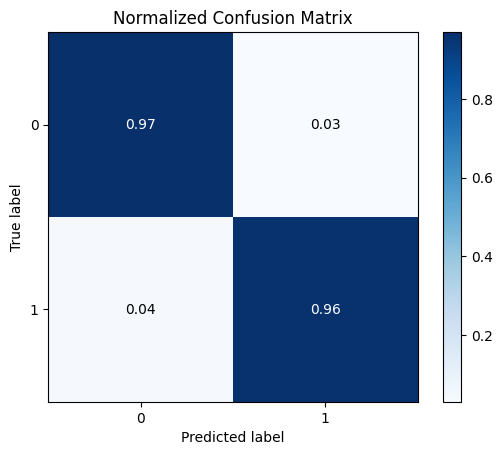

In [ ]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
auc=roc_auc_score(y_test, y_test_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_test, y_test_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)
#num_execucao+=1

On testing the ML model with logistic regression with under-sampling, the ability to hit fraudulent transactions has improved a litte bit, but precision has gotten bad again.

Final result:  
Accuracy: 97.3%. Precision: 5.7%. Recall: 94.5%. F1-score: 0.108. AUC: 0.961

## 7. Comparision all machine learning methods

We have below a summary comparision of the performance of all machine learning models used in this project. The worst value in each measure is marked in red, and the better one is marked in green, considering only the predictions made upon validation data:

<img src="https://github.com/marciusdm/dsnp/blob/main/assets/projeto4/MLResults.JPG?raw=true">

About predictions made upon test data, the model which had the best results was logistic regression with over-sampling, which beated the one using under-sampling on all performance measures.

The complete worksheet with detailed data about the all executions can be found [here](https://github.com/marciusdm/dsnp/raw/main/assets/projeto4/ComparisionMethodsML.xlsx).

## 8. Conclusions
In general, there isn't significative differences among the methods concerning to identifiy correctly frauds. The difference between the best method (Decision Tree) and the worst (Naive Bayes) is only 5 percentage points, and all model behaved pretty well.  
The major weakness of all this models is that they made many wrong positive predictions. Only logistic regression with over-sampling did well, but only on data that was balanced. Upon the orignal test data, which was imbalanced, this model also made many wrong positive predictions.
It will be necessary more advanced machine learning models in order to reduce the amount of false positives.